In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# from matplotlib.lines import Line2D
import seaborn as sns
import time

In [2]:
data = pd.read_csv('F:\Kuliah\Semester 7\Data Mining\Data Dow Jones\creditcard.csv', sep=',')
#data diambil dari kaggle.com/mlg-ulb/creditcardfraud

print (data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
data.shape

(284807, 31)

In [4]:
#print rangkuman statistik per feature
pd.options.display.float_format = "{:.6f}".format
data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,...,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,...,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,...,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,...,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [5]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

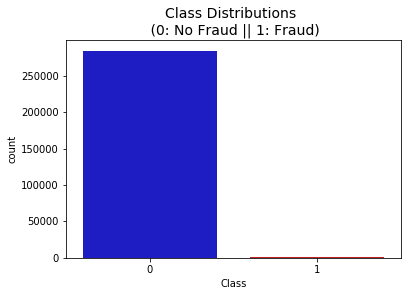

In [6]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [7]:
data.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [11]:
#periksa missing value pada dataframe
print (data.isnull().sum())


#tidak ada missing value

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [12]:
#cek tipe data tiap kolom
data.info()


#semua sudah dalam bentuk float/int, dataframe siap digunakan ke dalam model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler menghilangkan median dan men-scale data berdasarkan quartile range-nya
# StandardScaler menghilangkan mean dan men-scale data ke unit variance

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
#data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

#mengubah nama kolom Time Amount menjadi scaled_time dan scaled_amount
scaled_amount = data['scaled_amount']
#scaled_time = data['scaled_time']

data.drop(['scaled_amount'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
#data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [14]:
pd.options.display.float_format = "{:.6f}".format
data.describe(include='all')

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,...,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.001727
std,1.000002,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,...,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,0.041527
min,-0.353229,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.330840,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,...,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,0.000000
50%,-0.265271,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,...,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,0.000000
75%,-0.044717,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,...,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,0.000000
max,102.362243,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000


In [15]:
fraud_data_all = data.loc[data['Class'] == 1]
nonFraud_data_all = data.loc[data['Class']==0]

#menggabungkan data fraud dan non-fraud
normal_distributed_data_all = pd.concat([fraud_data_all, nonFraud_data_all])
normal_distributed_data_all.shape
#normal_distributed_data_all.head()
# data2.head()
#fraud_data_all.shape

X = normal_distributed_data_all.drop('Class', axis=1)
y = normal_distributed_data_all['Class']
#X --> variabel label untuk prediksi
#y --> variabel feature, semua kolom kecuali X (Class)

C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


               Gini-importance
V17                   0.202069
V14                   0.136999
V12                   0.104728
V16                   0.082501
V4                    0.056563
V10                   0.049173
V18                   0.038063
V11                   0.032815
V9                    0.024086
V3                    0.020024
V7                    0.017966
V21                   0.015747
V19                   0.015180
V20                   0.015012
V24                   0.014929
V2                    0.014556
V26                   0.013994
V1                    0.013985
V6                    0.013872
V22                   0.013771
V5                    0.013696
V27                   0.013246
scaled_amount         0.012738
V15                   0.011689
V28                   0.010968
V25                   0.010932
V13                   0.010872
V8                    0.010261
V23                   0.009565


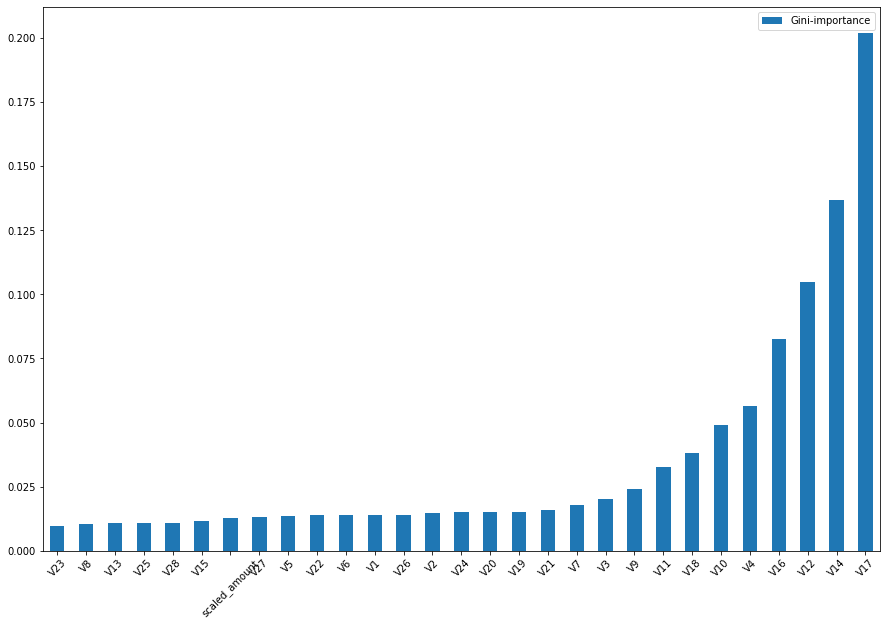

In [43]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

feature_selection_extra_trees = ExtraTreesClassifier()
feature_selection_extra_trees.fit(X,y)

feature_importance = feature_selection_extra_trees.feature_importances_

feats = {}
for feature, importance in zip(data.columns, feature_selection_extra_trees.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
print (importances.sort_values(by='Gini-importance', ascending=False))
importances.sort_values(by='Gini-importance').plot(kind='bar', figsize =(15,10), rot=45)

Hapus fitur yang nilai Gini-importance-nya kurang dari 0.2

In [46]:
X = normal_distributed_data_all.drop(['V23', 'V8', 'V13', 'V25', 'V28', 'V15', 
                                      'scaled_amount', 'V27', 'V5', 'V22', 'V6', 'V1', 'V26', 
                                      'V2', 'V24', 'V20', 'V19', 'V21', 'V7'], axis=1)

In [47]:
#Memecah dataframe baru menjadi training dan test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [48]:
print ("Rincian class pada data training {} dan testing {} " .format(Counter(y_train), Counter(y_test)))

Rincian class pada data training Counter({0: 199013, 1: 351}) dan testing Counter({0: 85302, 1: 141}) 


In [49]:
X_train.shape

(199364, 11)

In [50]:
X_test.shape

(85443, 11)

In [51]:
X_train['Class'] = y_train

C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
non_fraud = X_train.loc[X_train['Class']==0]
fraud = X_train.loc[X_train['Class']==1]

non_fraud_points = non_fraud.drop('Class', axis = 1)
fraud_points = fraud.drop('Class', axis = 1)

non_fraud_points=np.array(non_fraud_points)
fraud_points = np.array (fraud_points)

In [53]:
from scipy.spatial import distance
Y = distance.cdist(fraud_points, non_fraud_points, 'euclidean')

#mengurutkan hasil secara ascending
K = np.argsort(Y)
# print (Y)
# print ("Urutan data: \n", K)
Y.sort()
print ("After short: \n", Y[:,0:20])
Y.shape

After short: 
 [[ 3.80698723  5.26875771  6.07064176 ...  7.75714533  7.84745504
   8.02872558]
 [ 5.21158236  5.23366903  5.29698391 ...  9.54323531  9.59122293
   9.81722077]
 [ 9.41106949  9.44970923  9.53454616 ... 17.93779675 19.25334618
  19.28438405]
 ...
 [ 6.13415611  6.21194757  6.53163789 ... 11.81347002 11.88752838
  12.01465987]
 [10.51297877 10.57241255 10.5857887  ... 18.84517745 19.46293006
  19.49195888]
 [ 0.36672352  0.54590158  0.56621549 ...  0.85407043  0.85808661
   0.89000756]]


(351, 199013)

In [56]:
array_new = np.array(non_fraud_points[K[:,0:20]])
array_new.shape
XX= array_new.transpose(0,1,2).reshape(array_new.shape[0]*array_new.shape[1],10)
# XX
zeros_value = np.zeros((array_new.shape[0]*array_new.shape[1],1))
new_X = np.concatenate ((XX, zeros_value), axis=1)

print (new_X.shape)
new_X= np.unique(new_X,axis=0)
print (new_X.shape)

(7020, 11)
(1278, 11)


In [59]:
array_minority = np.array(fraud)
joined_resampling = np.concatenate((array_minority,new_X), axis=0)

X_resample = joined_resampling[:,0:10]
# X_resample = std_scaler.fit_transform(X_resample)
y_resample = joined_resampling[:,10]
# print (y)

print ('Setelah undersampling, komponen data: {}' .format(Counter(y_resample)))

Setelah undersampling, komponen data: Counter({0.0: 1278, 1.0: 351})


In [60]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_resample, y_resample)
finish = time.time()
X_resample.shape
print ("Waktu: {}" .format(finish-start))

Waktu: 0.15210390090942383


In [61]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_resample)
conf_matrix_train = confusion_matrix(y_resample, y_pred)
print (conf_matrix_train)
# print (X.shape)
print ("Classification Report:", '\n', classification_report_imbalanced(y_resample, y_pred))

[[1262   16]
 [  69  282]]
Classification Report: 
                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.95      0.99      0.80      0.97      0.89      0.81      1278
        1.0       0.95      0.80      0.99      0.87      0.89      0.78       351

avg / total       0.95      0.95      0.84      0.95      0.89      0.80      1629



In [63]:
X_test['Class'] = y_test
non_fraud2 = X_test.loc[X_test['Class']==0]
fraud2 = X_test.loc[X_test['Class']==1]

non_fraud2_points2 = non_fraud2.drop('Class', axis = 1)
fraud2_points2 = fraud2.drop('Class', axis = 1)

non_fraud2_points2=np.array(non_fraud2_points2)
fraud2_points2 = np.array (fraud2_points2)

zeros_value2 = np.zeros((non_fraud2_points2.shape[0],1), dtype=np.int8)

new_non_fraud = np.concatenate((non_fraud2_points2, zeros_value2), axis=1)

array_majority2 = np.array(fraud2)
joined_testing =np.concatenate ((array_majority2, new_non_fraud), axis =0)

X_test_new = joined_testing[:,0:10]
# X_test_new = rob_scaler.fit_transform(X_test_new)
y_test_new = joined_testing[:,10]


print (X_test_new.shape)
print ("Rincian class pada data  testing {} " .format(Counter(y_test_new)))

(85443, 10)
Rincian class pada data  testing Counter({0.0: 85302, 1.0: 141}) 


C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
start = time.time()
y_pred_test = knn.predict(X_test_new)
conf_matrix_test = confusion_matrix(y_test_new, y_pred_test)
print (conf_matrix_test)
# print (X.shape)
print ("Classification Report:", '\n', classification_report_imbalanced(y_test_new, y_pred_test))
finish = time.time()
print ("Waktu: {}" .format(finish-start))

[[85288    14]
 [   30   111]]
Classification Report: 
                    pre       rec       spe        f1       geo       iba       sup

        0.0       1.00      1.00      0.79      1.00      0.89      0.80     85302
        1.0       0.89      0.79      1.00      0.83      0.89      0.77       141

avg / total       1.00      1.00      0.79      1.00      0.89      0.80     85443

Waktu: 8.078362703323364


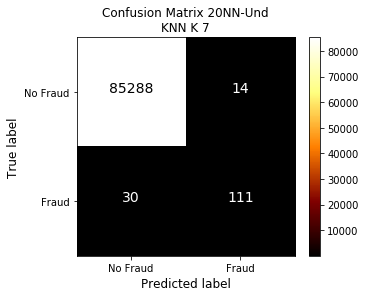

In [65]:


#log
#mengganti testing setnya dengan testing set untuk data keseluruhan
knn_cf = confusion_matrix(y_test_new, y_pred_test)

import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=12)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize=10)
    plt.yticks(tick_marks, classes, fontsize=10)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white",fontsize=14)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(5,4))

plot_confusion_matrix(knn_cf, labels, title="Confusion Matrix 20NN-Und\nKNN K {}" .format(knn.n_neighbors), cmap=plt.cm.afmhot)